In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
X_train  = X_train/255
X_test = X_test/255

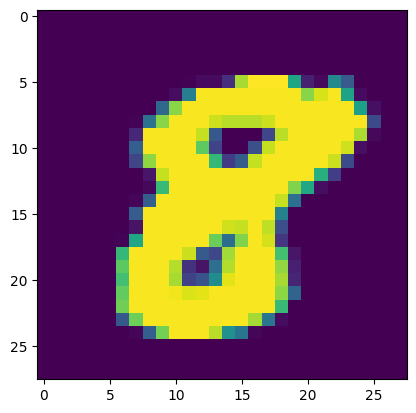

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1267])

In [15]:
model = Sequential()

In [16]:
model.add(Flatten(input_shape=(28,28)))   #Output of flatten will be given as input for the Dense, so no need to mention input_dim for the Dense Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
hist = model.fit(X_train , y_train , epochs = 10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9712 - val_loss: 0.1291
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9954 - loss: 0.0157 - val_accuracy: 0.9766 - val_loss: 0.1114
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9730 - val_loss: 0.1295
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9950 - loss: 0.0142 - val_accuracy: 0.9709 - val_loss: 0.1394
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9750 - val_loss: 0.1240
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9954 - loss: 0.0132 - val_accuracy: 0.9749 - val_loss: 0.1258
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9761 - val_loss: 0.1309
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9980 - loss: 0.00

In [29]:
y_probability = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
y_pred = y_probability.argmax(axis=1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9768

In [33]:
hist.history

{'accuracy': [0.9942708611488342,
  0.9947708249092102,
  0.9951249957084656,
  0.9943958520889282,
  0.9961458444595337,
  0.9956666827201843,
  0.996833324432373,
  0.996708333492279,
  0.9976041913032532,
  0.9963958263397217],
 'loss': [0.016727950423955917,
  0.01655297540128231,
  0.013698170892894268,
  0.015593609772622585,
  0.011748484335839748,
  0.012650991789996624,
  0.010344256646931171,
  0.010602634400129318,
  0.007312792353332043,
  0.010745522566139698],
 'val_accuracy': [0.9711666703224182,
  0.9765833616256714,
  0.9729999899864197,
  0.9709166884422302,
  0.9750000238418579,
  0.9749166369438171,
  0.9760833382606506,
  0.9735000133514404,
  0.9766666889190674,
  0.9749166369438171],
 'val_loss': [0.12910372018814087,
  0.11140090972185135,
  0.12949024140834808,
  0.13935235142707825,
  0.1239682286977768,
  0.12583039700984955,
  0.1309100091457367,
  0.14563070237636566,
  0.14618216454982758,
  0.1465376615524292]}

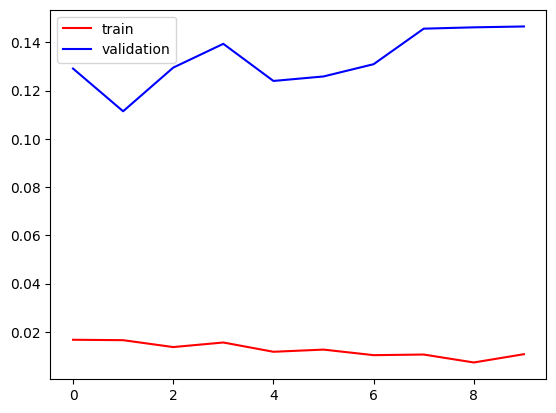

In [34]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

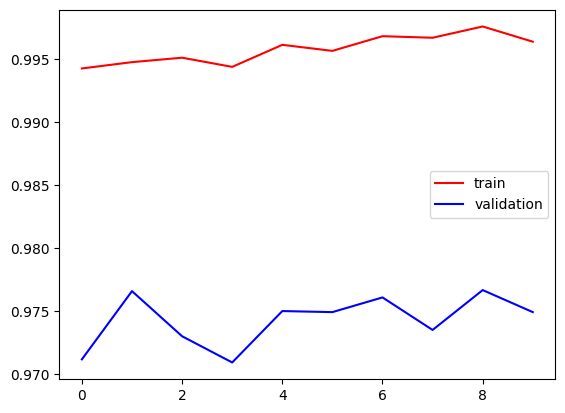

In [35]:
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

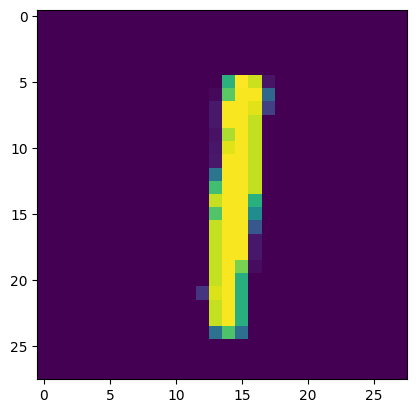

In [49]:
plt.imshow(X_test[1213])

In [50]:
probbies = model.predict(X_test[1213].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [51]:
pred_res = probbies.argmax(axis=1)

In [52]:
print("The predicted number from the image is, ",pred_res)

The predicted number from the image is,  [1]
